# Credit Card Fraud Detection
The dataset used in this notebook is highly imbalanced. Therefore, I have used different approaches to deal with it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

__Dataset downloaded from Kaggle.
Download link: https://www.kaggle.com/mlg-ulb/creditcardfraud__

In [2]:
df= pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
nul= df.isna().sum()
print(nul)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

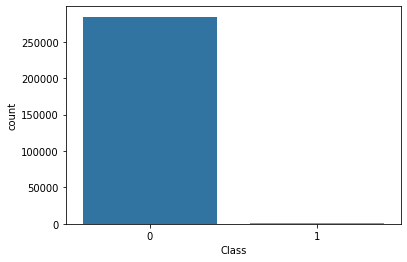

In [6]:
sns.countplot(df['Class'])

In [7]:
count= df['Class'].value_counts()
count= count/len(df)*100
print('Percentage of non fraud transactions: {:.2f}%'.format(count[0]))
print('Percentage of fraud transactions: {:.2f}%'.format(count[1]))


Percentage of non fraud transactions: 99.83%
Percentage of fraud transactions: 0.17%


__Dataset is highly imabalanced__

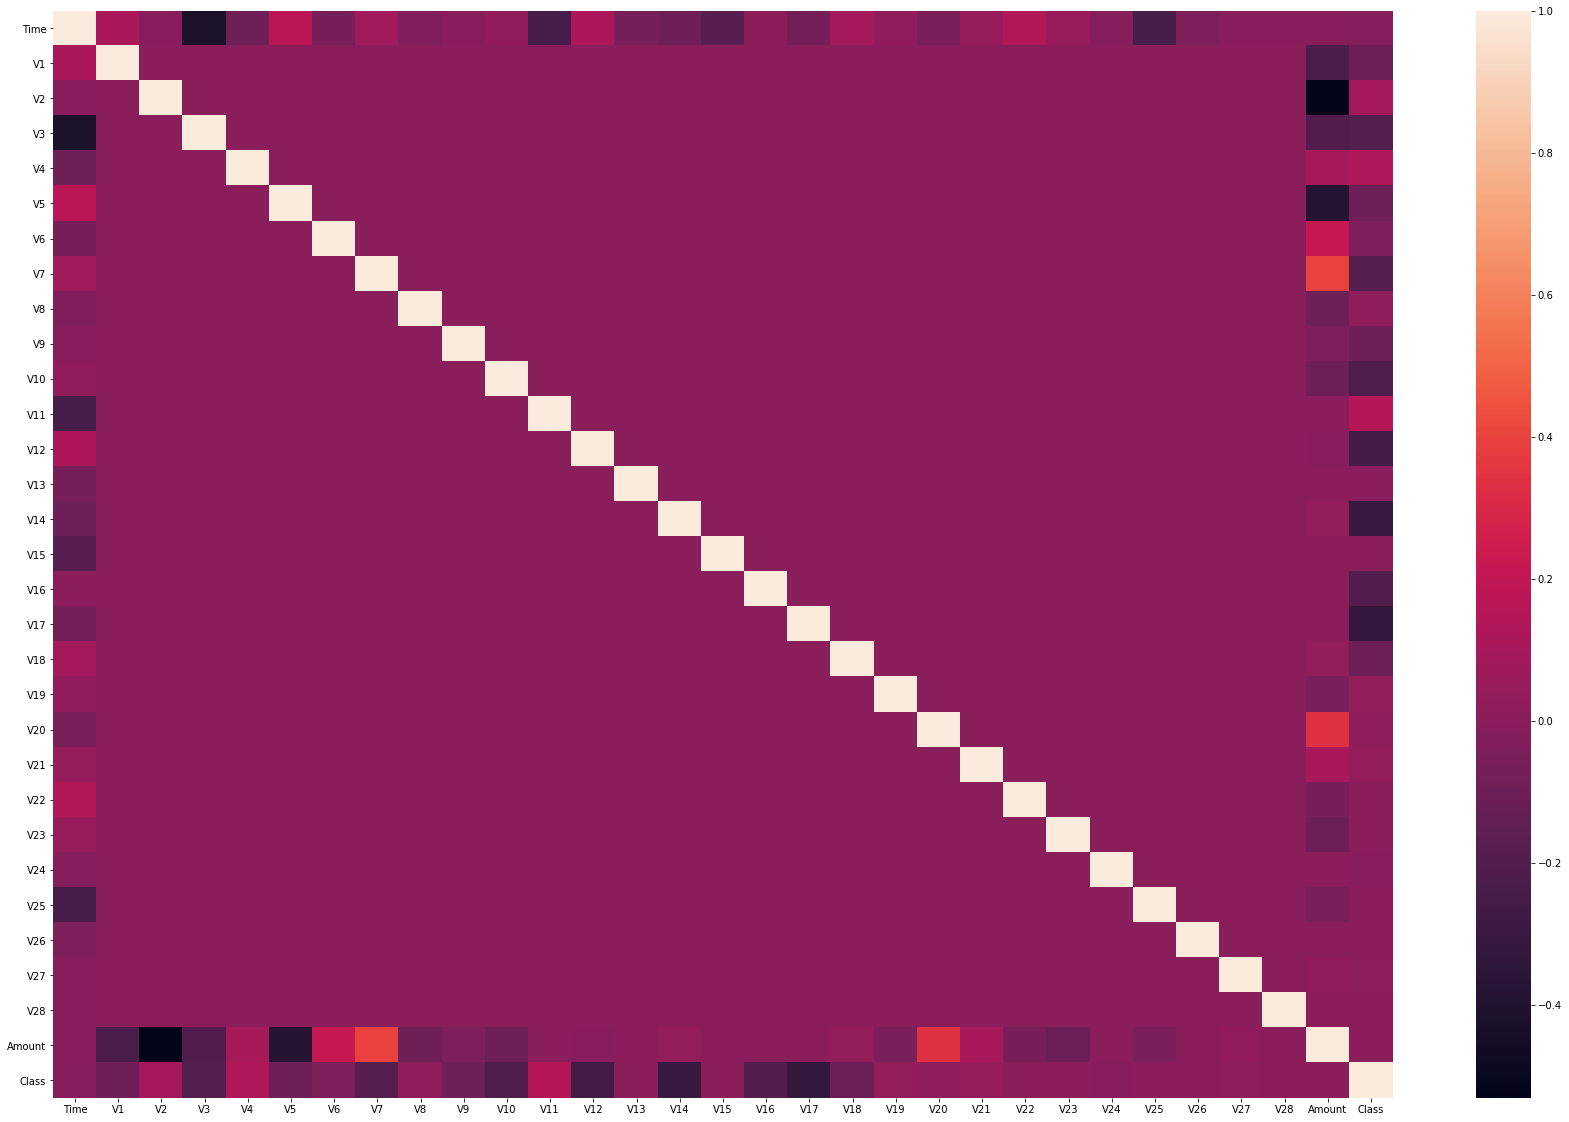

In [8]:
cor= df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(cor)

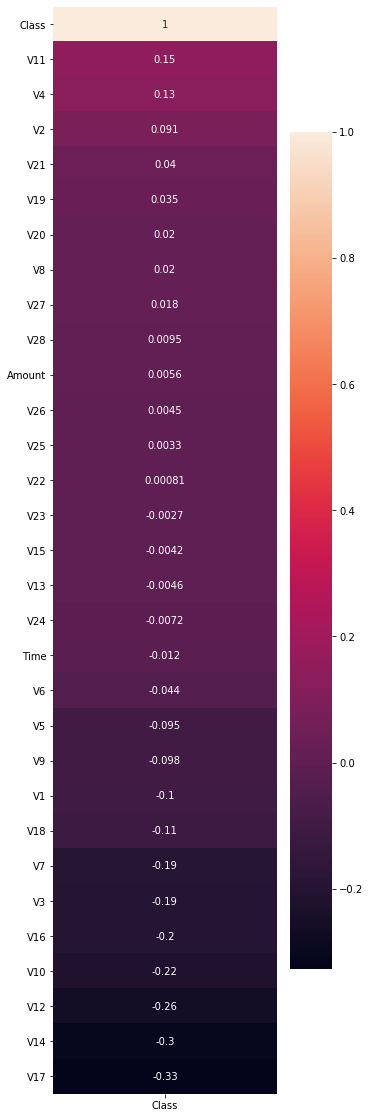

In [9]:
plt.figure(figsize=(5,20))
sns.heatmap(cor[['Class']].sort_values(by=['Class'], ascending=False), annot=True)

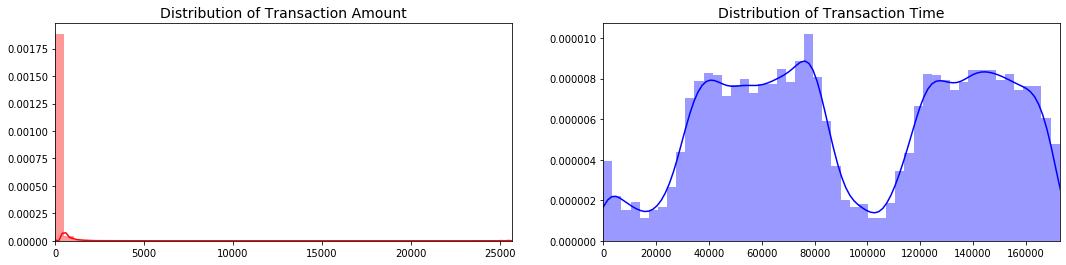

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

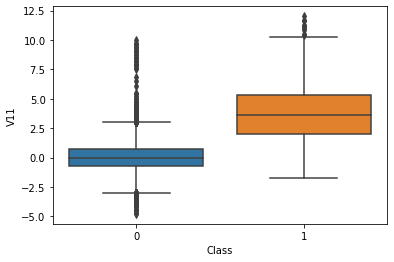

In [11]:
sns.boxplot(x='Class', y='V11', data=df)

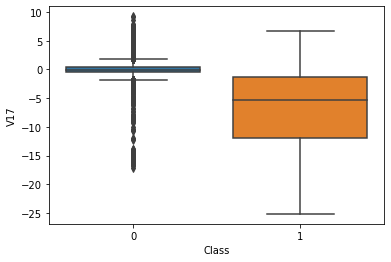

In [12]:
sns.boxplot(x='Class', y='V17', data=df)

## Undersampling

### Sub sampling to create a balanced dataset

In [13]:
#Scaling time and amount features
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()
df['Amount']= std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time']= std_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
#Shuffling Dataset
df= df.sample(frac=1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37308,-1.177430,-1.948561,0.883574,-0.832719,-1.254614,-2.953686,0.892269,3.175510,0.228270,-0.707266,...,-0.200481,-0.533468,0.476328,-0.382893,0.051280,0.724433,0.383769,-0.063761,2.441433,0
131360,-0.320962,1.140310,0.048683,0.664428,1.448274,-0.409145,0.010268,-0.207347,0.106452,0.624527,...,-0.058232,0.081320,-0.067370,0.087378,0.609360,-0.267618,0.052254,0.019163,-0.313249,0
242266,1.191945,0.038136,0.580730,-0.507179,-0.907247,1.768349,1.219278,0.762048,0.355227,0.031817,...,-0.278404,-0.492436,0.150008,-0.867343,-0.700089,0.188071,0.093942,-0.164461,-0.281304,0
70350,-0.862972,0.645573,-0.419194,0.088680,1.245510,-0.174088,-0.109024,0.531370,-0.033480,-0.557744,...,-0.228694,-1.290322,0.010357,-0.044269,0.063760,-0.855282,-0.023274,0.062087,0.706263,0
82328,-0.746606,1.223116,0.212560,0.635293,0.706866,-0.676058,-1.185337,0.056445,-0.209991,0.070963,...,-0.235318,-0.714605,0.174446,0.697892,0.160191,0.074646,-0.032112,0.022890,-0.317287,0


In [15]:
fraud_df= df.loc[df['Class']==1]
non_fraud_df= df.loc[df['Class']==0][:492]
sample_df= pd.concat([fraud_df, non_fraud_df])
sample_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
241254,1.182090,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,...,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,-0.316087,1
10484,-1.634660,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,0.860044,...,-0.423554,-0.800852,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,-0.338077,1
150666,-0.020086,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,...,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,-0.041379,1
135718,-0.283058,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,-0.322964,1
131272,-0.321636,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,...,-1.032935,1.196428,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,-0.352430,1


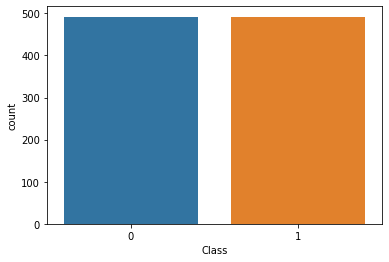

In [16]:
sns.countplot('Class', data=sample_df)

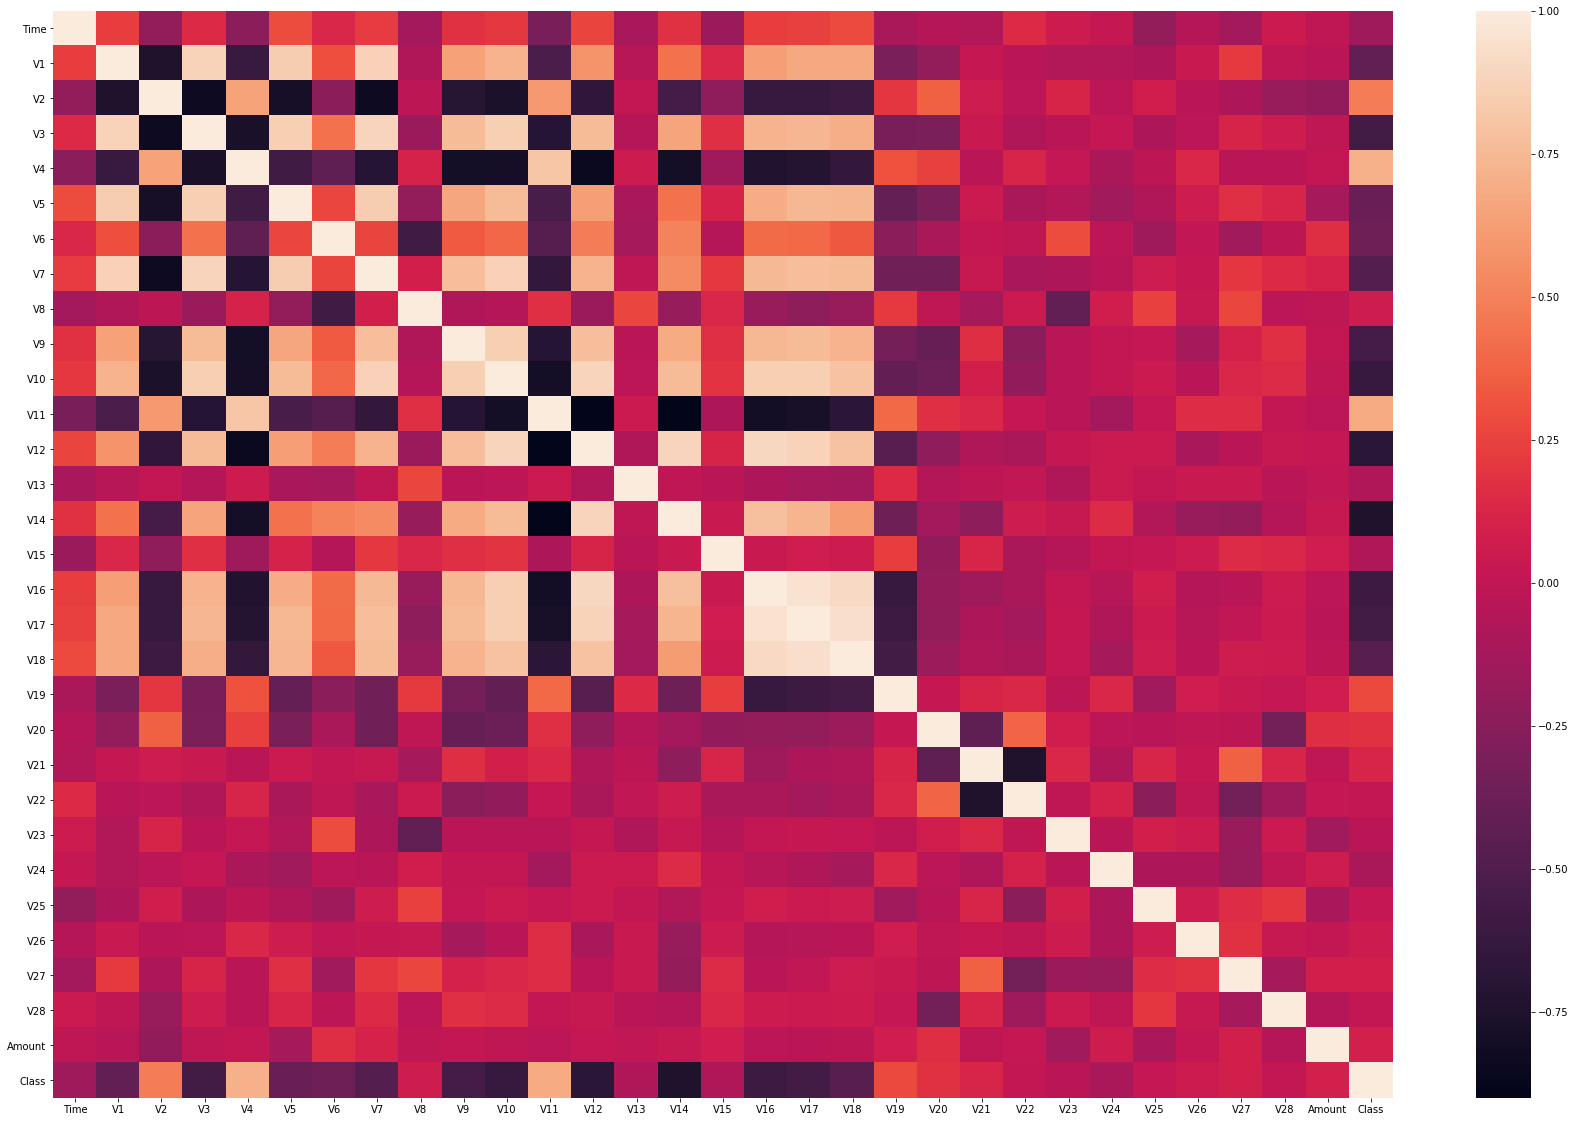

In [17]:
sample_corr= sample_df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(sample_corr)

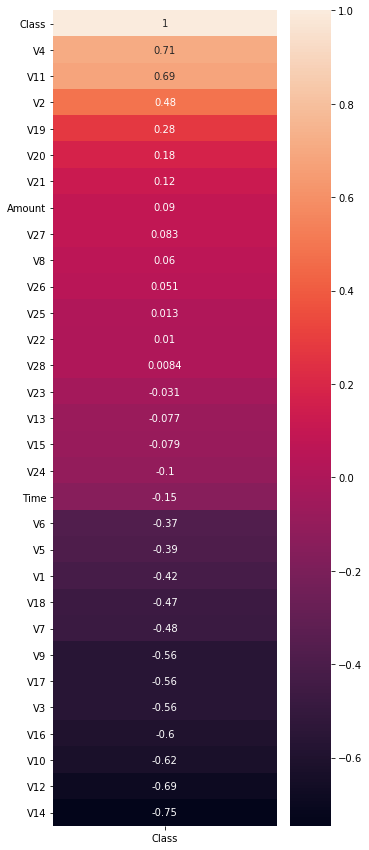

In [18]:
plt.figure(figsize=(5,15))
sns.heatmap(sample_corr[['Class']].sort_values(by='Class', ascending=False), annot=True)

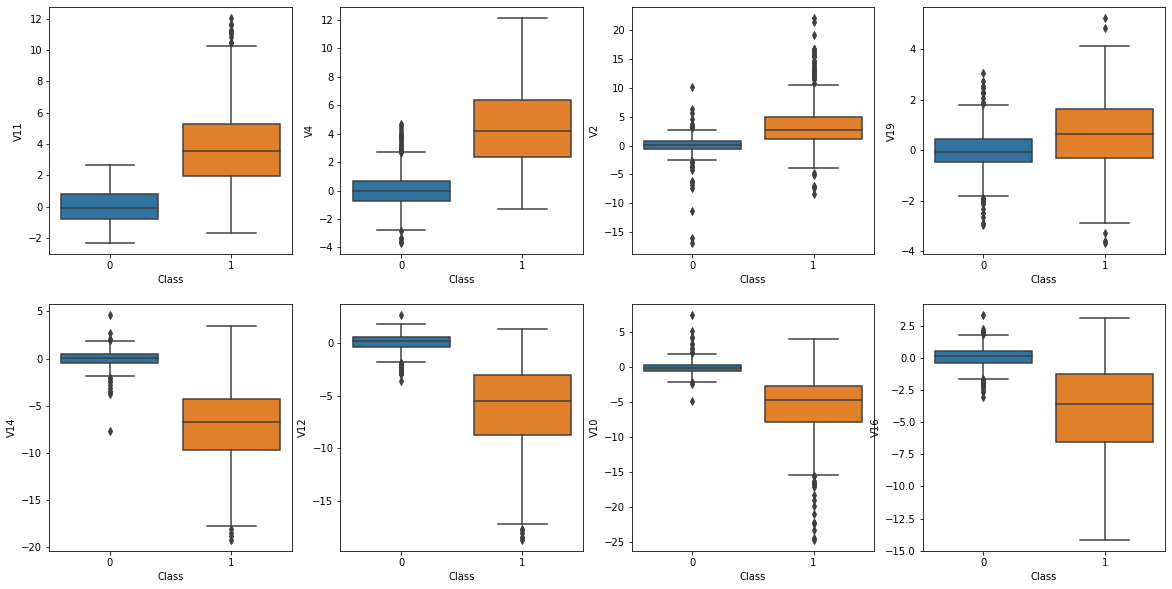

In [19]:
#Plotting top 4 positive and negative correlations
fig= plt.figure(figsize=(20,10))
y_plots= ['V11','V4','V2','V19', 'V14', 'V12', 'V10', 'V16']
for idx in range(len(y_plots)):
    ax = fig.add_subplot(2, 8/2, idx+1)
    sns.boxplot(x='Class', y=y_plots[idx], data= sample_df)
    

## Classification on Sub- sampled Dataset

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [21]:
y= sample_df['Class']
x= sample_df.drop(['Class'], axis=1)
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
241254,1.182090,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,...,0.353898,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,-0.316087
10484,-1.634660,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,0.860044,...,-0.217358,-0.423554,-0.800852,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,-0.338077
150666,-0.020086,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,...,-0.646818,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,-0.041379
135718,-0.283058,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,...,0.370041,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,-0.322964
131272,-0.321636,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,...,0.732852,-1.032935,1.196428,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,-0.352430


In [22]:
train_x, test_x, train_y, test_y= train_test_split(x,y, test_size=0.2, random_state=10)
print(train_x.shape)
print(test_x.shape)

(787, 30)
(197, 30)


In [23]:
from plot_confusion_matrix import plot_confusion_matrix

Logistic Regression Validation Accuracy: 0.939


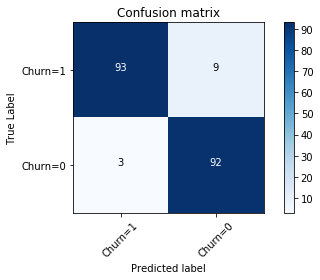

In [24]:
lr_classifier= LogisticRegression()
lr_classifier.fit(train_x, train_y)
valid_predict= lr_classifier.predict(test_x)
print('Logistic Regression Validation Accuracy: {:.3f}'.format(accuracy_score(test_y, valid_predict)))
cm=confusion_matrix(test_y, valid_predict, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Churn=1','Churn=0'])

Decision Tree Classifier Validation Accuracy: 0.888


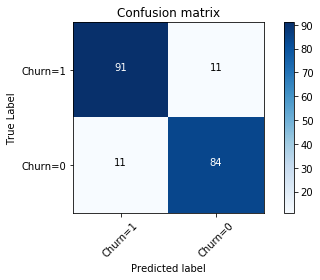

In [25]:
dt_classifier= DecisionTreeClassifier()
dt_classifier.fit(train_x, train_y)
valid_predict= dt_classifier.predict(test_x)
print('Decision Tree Classifier Validation Accuracy: {:.3f}'.format(accuracy_score(test_y, valid_predict)))
cm=confusion_matrix(test_y, valid_predict, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Churn=1','Churn=0'])

Random Forest Classifier Validation Accuracy: 0.929


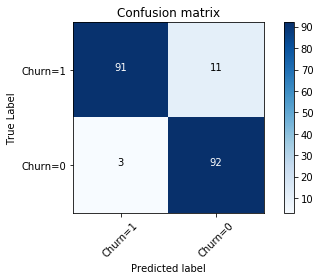

In [26]:
rf_classifier= RandomForestClassifier()
rf_classifier.fit(train_x, train_y)
valid_predict= rf_classifier.predict(test_x)
print('Random Forest Classifier Validation Accuracy: {:.3f}'.format(accuracy_score(test_y, valid_predict)))
cm=confusion_matrix(test_y, valid_predict, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Churn=1','Churn=0'])

Support Vector Classifier Validation Accuracy: 0.909


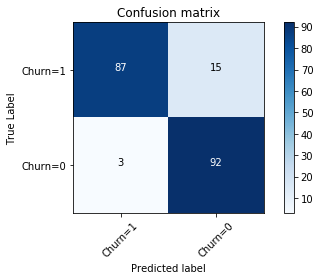

In [27]:
svc_classifier= SVC()
svc_classifier.fit(train_x, train_y)
valid_predict= svc_classifier.predict(test_x)
print('Support Vector Classifier Validation Accuracy: {:.3f}'.format(accuracy_score(test_y, valid_predict)))
cm=confusion_matrix(test_y, valid_predict, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Churn=1','Churn=0'])

K Neighbors Classifier Validation Accuracy: 0.924


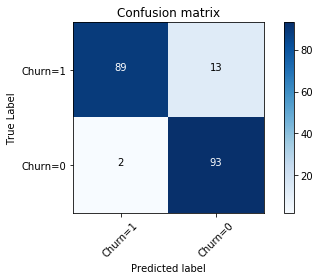

In [28]:
kn_classifier= KNeighborsClassifier()
kn_classifier.fit(train_x, train_y)
valid_predict= kn_classifier.predict(test_x)
print('K Neighbors Classifier Validation Accuracy: {:.3f}'.format(accuracy_score(test_y, valid_predict)))
cm=confusion_matrix(test_y, valid_predict, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Churn=1','Churn=0'])

## Classification on Original Dataset

In [29]:
y= df['Class']
x= df.drop(['Class'], axis=1)
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
37308,-1.177430,-1.948561,0.883574,-0.832719,-1.254614,-2.953686,0.892269,3.175510,0.228270,-0.707266,...,0.187517,-0.200481,-0.533468,0.476328,-0.382893,0.051280,0.724433,0.383769,-0.063761,2.441433
131360,-0.320962,1.140310,0.048683,0.664428,1.448274,-0.409145,0.010268,-0.207347,0.106452,0.624527,...,-0.223051,-0.058232,0.081320,-0.067370,0.087378,0.609360,-0.267618,0.052254,0.019163,-0.313249
242266,1.191945,0.038136,0.580730,-0.507179,-0.907247,1.768349,1.219278,0.762048,0.355227,0.031817,...,-0.028497,-0.278404,-0.492436,0.150008,-0.867343,-0.700089,0.188071,0.093942,-0.164461,-0.281304
70350,-0.862972,0.645573,-0.419194,0.088680,1.245510,-0.174088,-0.109024,0.531370,-0.033480,-0.557744,...,0.391441,-0.228694,-1.290322,0.010357,-0.044269,0.063760,-0.855282,-0.023274,0.062087,0.706263
82328,-0.746606,1.223116,0.212560,0.635293,0.706866,-0.676058,-1.185337,0.056445,-0.209991,0.070963,...,-0.110015,-0.235318,-0.714605,0.174446,0.697892,0.160191,0.074646,-0.032112,0.022890,-0.317287


In [30]:
train_x, test_x, train_y, test_y= train_test_split(x,y, test_size=0.2, random_state=10)
print(train_x.shape)
print(test_x.shape)

(227845, 30)
(56962, 30)


In [31]:
test_y.value_counts()

0    56865
1       97
Name: Class, dtype: int64

__Fitting Logistic Regression on the original dataset__

Logistic Regression Validation Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.91      0.66      0.77        97

    accuracy                           1.00     56962
   macro avg       0.96      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962



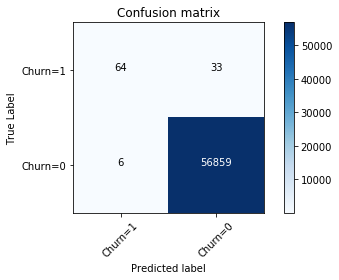

In [32]:
classifier= LogisticRegression()
classifier.fit(train_x, train_y)
valid_predict= classifier.predict(test_x)
print('Logistic Regression Validation Accuracy: {:.3f}'.format(accuracy_score(test_y, valid_predict)))
print(classification_report(test_y, valid_predict))
cm=confusion_matrix(test_y, valid_predict, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Churn=1','Churn=0'])

Due to highly imbalanced dataset the model performs bad in predicting the frauds

__Directly applying Logistic Regression on original dataset using previously trained undersampled model__

Undersampled Logistic Regression Validation Accuracy: 0.972
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56865
           1       0.05      0.92      0.10        97

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



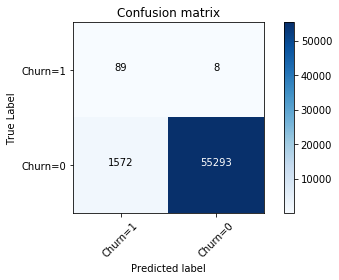

In [33]:
valid_predict= lr_classifier.predict(test_x)
print('Undersampled Logistic Regression Validation Accuracy: {:.3f}'.format(accuracy_score(test_y, valid_predict)))
print(classification_report(test_y, valid_predict))
cm=confusion_matrix(test_y, valid_predict, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Churn=1','Churn=0'])

__The undersampled model is able to predict frauds in the original imbalanced dataset more accurately rather than directly training model on dataset. Although the precision in undersampling case is almost dropped to zero due to high amount of false positive predictions(Precision)__
